In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn 

In [3]:
file = "winemag-data_first150k.csv"

In [4]:
#read in csv 
df = pd.read_csv(file)

#drop Unnamed column
df = df.drop("Unnamed: 0", axis=1)
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      150925 non-null  object 
 1   description  150930 non-null  object 
 2   designation  105195 non-null  object 
 3   points       150930 non-null  int64  
 4   price        137235 non-null  float64
 5   province     150925 non-null  object 
 6   region_1     125870 non-null  object 
 7   region_2     60953 non-null   object 
 8   variety      150930 non-null  object 
 9   winery       150930 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 11.5+ MB
None
              points          price
count  150930.000000  137235.000000
mean       87.888418      33.131482
std         3.222392      36.322536
min        80.000000       4.000000
25%        86.000000      16.000000
50%        88.000000      24.000000
75%        90.000000      40.000000
max       100.000

In [5]:
#drop NaN values for country and price columns
mask = pd.notnull(df.country)
mask2 = pd.notnull(df.price)
clean_df = df.loc[mask & mask2].reset_index(drop=True)
clean_df.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [6]:
#get list of countries
clean_df.country.value_counts()

US                        62139
Italy                     18784
France                    14785
Spain                      8160
Chile                      5766
Argentina                  5587
Australia                  4894
Portugal                   4176
New Zealand                3070
Austria                    2483
Germany                    2347
South Africa               2237
Greece                      872
Israel                      610
Hungary                     230
Canada                      194
Romania                     139
Uruguay                      85
Croatia                      83
Slovenia                     81
Bulgaria                     77
Moldova                      71
Mexico                       63
Turkey                       50
Georgia                      43
Lebanon                      37
Cyprus                       31
Brazil                       25
Macedonia                    16
Serbia                       14
Morocco                      12
Luxembou

In [7]:
#look to see if US-France is a legitimate option for country
mask3 = clean_df.country == "US-France"
clean_df.loc[mask3]

,country,description,designation,points,price,province,region_1,region_2,variety,winery
130712,US-France,"Defies categorization, in more ways than one. ...",NaN,88,50.0,Santa Barbara County-Condrieu,NaN,NaN,Viognier,Deux C


In [8]:
#Look at top ten countries to see the spread
top10 = clean_df.country.value_counts()[0:10].sort_values(ascending=True)

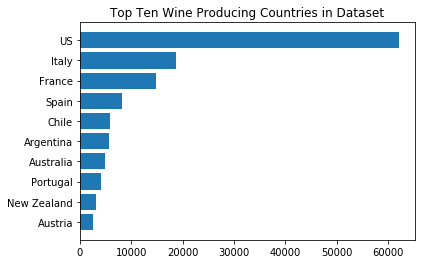

In [9]:
plt.barh(top10.index, top10.values)
plt.title('Top Ten Wine Producing Countries in Dataset')
plt.show()

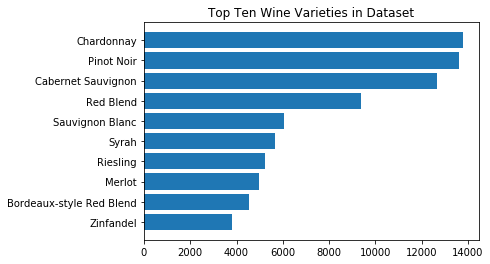

In [10]:
#Look at top ten varieties to see the spread
variety10 = clean_df.variety.value_counts()[0:10].sort_values(ascending=True)
plt.barh(variety10.index, variety10.values)
plt.title('Top Ten Wine Varieties in Dataset')
plt.show()

In [11]:
#get varieties of wine for red vs white categorization 
counts = clean_df.variety.value_counts()
counts

Chardonnay               13775
Pinot Noir               13625
Cabernet Sauvignon       12671
Red Blend                 9377
Sauvignon Blanc           6054
                         ...  
Irsai Oliver                 1
Merlot-Petite Verdot         1
Baga-Touriga Nacional        1
Aidani                       1
St. Vincent                  1
Name: variety, Length: 619, dtype: int64

In [12]:
#export to csv 
counts.to_csv("Wine.csv", index=True)

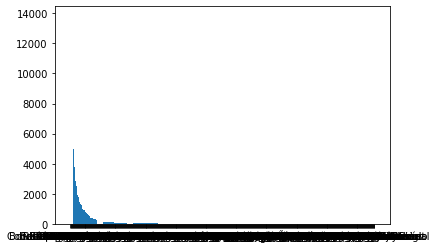

In [13]:
#look at spread of all varieties
plt.bar(counts.index, counts.values)
plt.show()

In [14]:
#read in csv with comparison - since only goes through varieties >= 30 wines, drop any that aren't assigned
reds = pd.read_csv('Wine_Reds.csv').dropna()

#rename column for the merge
reds = reds.rename(columns = {"Variety":"variety"})
reds.head()

,variety,Counts,Red?
0,Chardonnay,13775,False
1,Pinot Noir,13625,True
2,Cabernet Sauvignon,12671,True
3,Red Blend,9377,True
4,Sauvignon Blanc,6054,False


In [15]:
#merge the dataframes - merge function will fill in T/F for the value 
temp = pd.merge(clean_df,reds,on = "variety", how = "left")

#bring back only the fields that have values for red vs white
mask5 = pd.notnull(temp["Red?"])
wine_df = temp.loc[mask5].reset_index(drop=True)
wine_df.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery,Counts,Red?
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,12671.0,True
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,221.0,True
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,6054.0,False
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,13625.0,True
4,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia,221.0,True


In [16]:
#cast boolean arguments as integers to be able to incorporate into model
wine_df['Still_Red'] = wine_df['Red?'].astype(int)

##### wine_df: Varieties of wine with 30 or more wines reviewed

In [17]:
wine_df.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery,Counts,Red?,Still_Red
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,12671.0,True,1
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,221.0,True,1
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,6054.0,False,0
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,13625.0,True,1
4,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia,221.0,True,1


##### wine_red: wine_df split into red wines (red wines where the variety had 30 or more wines reviewed)

In [18]:
#create df with only red wines and look at distribution of wines by country 
mask_red = wine_df.Still_Red == 1
wine_red = wine_df.loc[mask_red]
wine_red.country.value_counts()

US                44550
Italy             13365
France             8021
Spain              6510
Argentina          4735
Chile              4060
Australia          3314
Portugal           2982
Austria            1620
South Africa       1277
New Zealand        1129
Greece              513
Israel              470
Germany             192
Hungary              80
Uruguay              72
Romania              64
Canada               61
Mexico               42
Bulgaria             42
Moldova              42
Slovenia             25
Brazil               24
Cyprus               23
Lebanon              23
Turkey               22
Croatia              16
Lithuania             8
Morocco               7
Georgia               7
Macedonia             6
England               6
India                 4
Ukraine               4
Serbia                3
Switzerland           2
Czech Republic        2
Name: country, dtype: int64

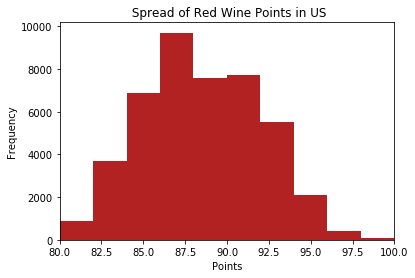

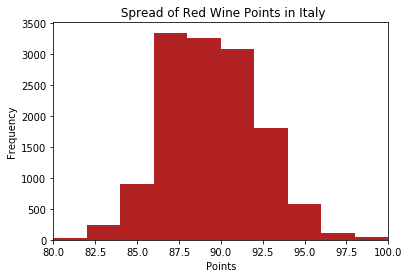

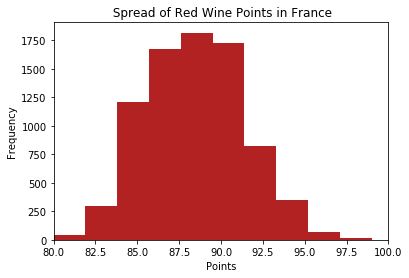

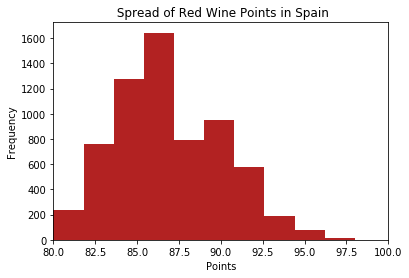

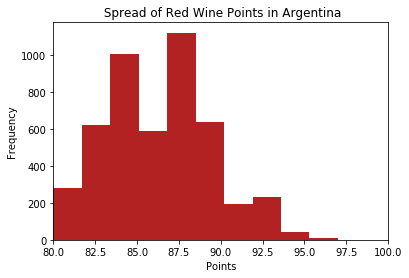

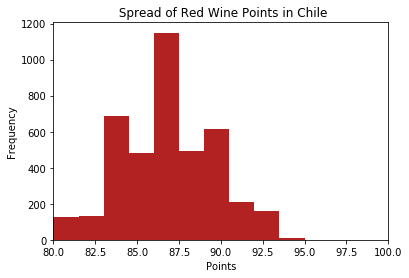

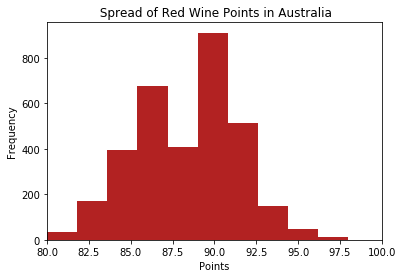

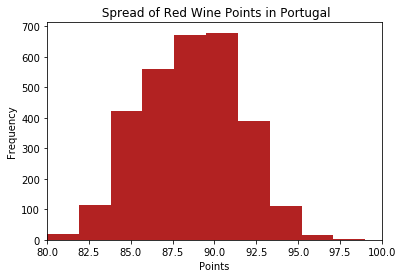

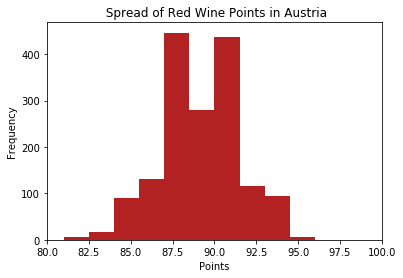

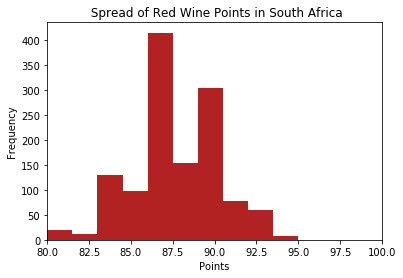

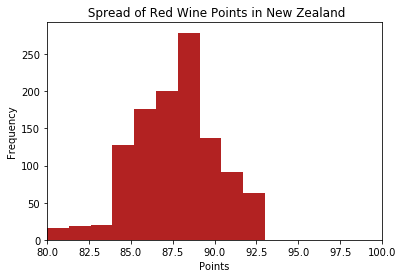

In [88]:
#print histograms for the top thirteen countries - WHY DID WE PICK THIRTEEN? 
for country in wine_red.country.value_counts().index[0:11]:
    mask6 = wine_red.country == country 
    red_wine = wine_red.loc[mask6]
    
    plt.hist(red_wine.points, bins = 10, color = 'firebrick')
    plt.xlim(80,100)
    plt.title(f' Spread of Red Wine Points in {country}')
    plt.xlabel('Points')
    plt.ylabel('Frequency')
    plt.show()

##### red2: dataframe of the top thirteen represented red-wine countries in wine_red

In [92]:
#create df with top thirteen red wine producing countries
mask8 = wine_red.country.isin(wine_red.country.value_counts().head(12).index)
red2 = wine_red.loc[mask8]
red2.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery,Counts,Red?,Still_Red
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,12671.0,True,1
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,221.0,True,1
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,13625.0,True,1
4,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia,221.0,True,1
5,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,NaN,Tinta de Toro,Maurodos,221.0,True,1


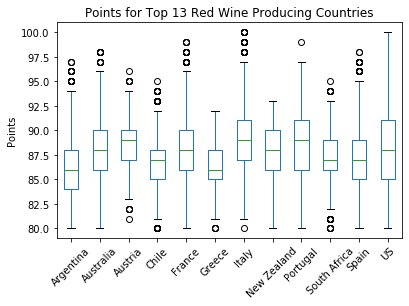

In [94]:
#plot the points spread for each of the top thirteen countries 
#NEED TO CLEAN UP GRAPHS - FIX TITLE AND AXIS LABELS 
red2.boxplot(column = 'points', by = 'country', rot = 45, grid = False)
plt.title('Points for Top 12 Red Wine Producing Countries')
plt.xlabel('')
plt.ylabel('Points')
plt.suptitle('')
plt.show()

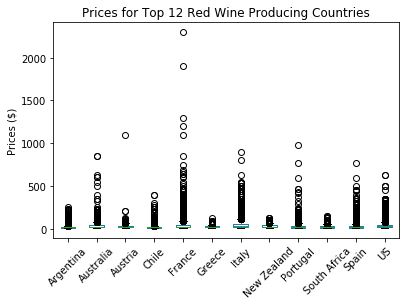

In [97]:
#boxplots to show price distribution by country - THIS WILL BE GOOD TO SHOW IMPACT OF OUTLIERS
red2.boxplot(column = 'price', by = 'country', rot = 45, grid = False)
plt.title('Prices for Top 12 Red Wine Producing Countries')
plt.xlabel('')
plt.ylabel('Prices ($)')
plt.suptitle('')
plt.show()

##### wine_white: wine_df grouped into white wines (where variety had 30 or more wines reviewed)

In [23]:
#create df for white wines only 
mask_white = wine_df.Still_Red == 0
wine_white = wine_df.loc[mask_white]
wine_white.country.value_counts()


US                17021
France             6467
Italy              4785
Germany            2109
New Zealand        1936
Chile              1626
Australia          1500
Spain              1217
Portugal            926
South Africa        920
Argentina           800
Austria             750
Greece              290
Israel              128
Canada              120
Hungary             116
Romania              57
Slovenia             46
Bulgaria             25
Moldova              25
Croatia              20
Mexico               18
Lebanon              13
Uruguay              10
Luxembourg            9
Georgia               5
India                 4
Morocco               4
Slovakia              3
China                 3
Cyprus                2
Turkey                2
Serbia                2
England               2
Switzerland           1
Ukraine               1
US-France             1
Brazil                1
Czech Republic        1
Name: country, dtype: int64

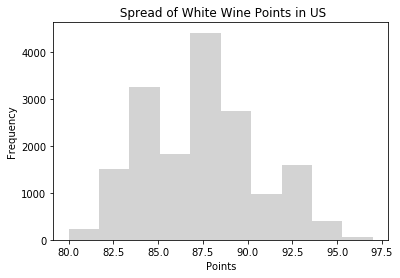

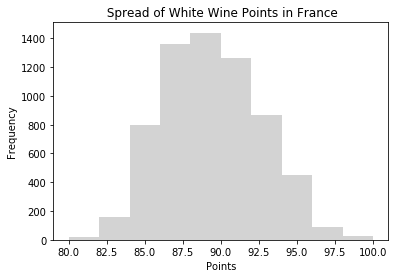

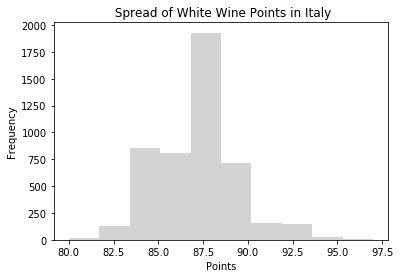

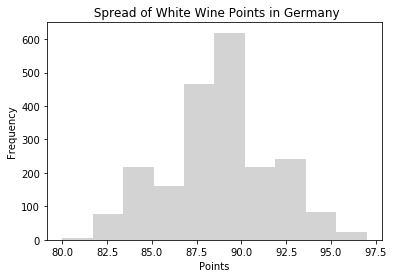

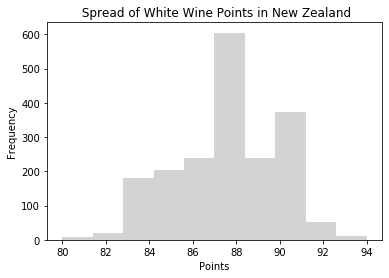

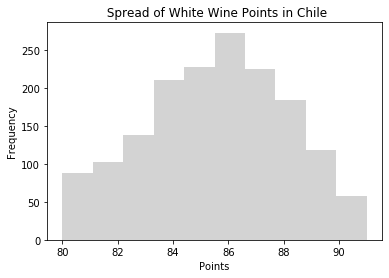

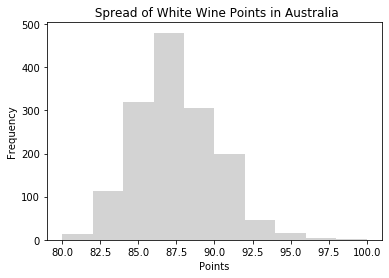

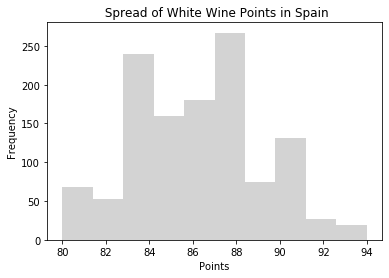

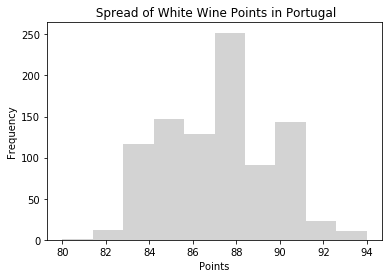

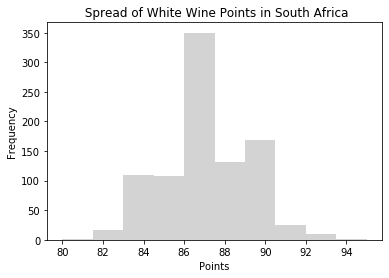

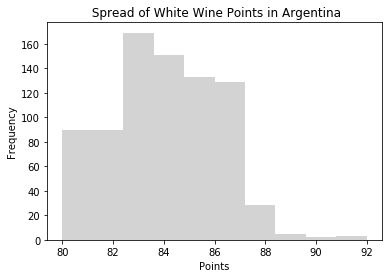

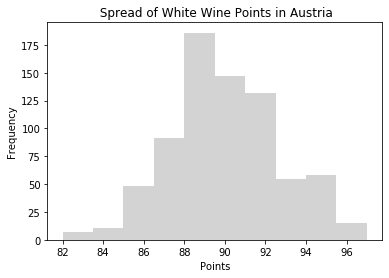

In [103]:
#create histograms for the top thirteen wines 
for country in wine_white.country.value_counts().index[0:12]:
    mask7 = wine_white.country == country 
    white_wine = wine_white.loc[mask7]
    
    plt.hist(white_wine.points, bins = 10, color = 'lightgrey')
    plt.title(f' Spread of White Wine Points in {country}')
    plt.xlabel('Points')
    plt.ylabel('Frequency')
    plt.show()

##### white2: dataframe with top thirteen represented white wine producing countries in wine_white

In [100]:
#create df for top thirteen wines
mask9 = wine_white.country.isin(wine_white.country.value_counts().index[0:12])
white2 = wine_white.loc[mask9]
white2.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery,Counts,Red?,Still_Red
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,6054.0,False,0
14,US,"First made in 2006, this succulent luscious Ch...",Sigrid,95,90.0,Oregon,Willamette Valley,Willamette Valley,Chardonnay,Bergström,13775.0,False,0
22,US,The apogee of this ambitious winery's white wi...,Giallo Solare,95,60.0,California,Edna Valley,Central Coast,Chardonnay,Center of Effort,13775.0,False,0
24,New Zealand,"Yields were down in 2015, but intensity is up,...",Maté's Vineyard,94,57.0,Kumeu,NaN,NaN,Chardonnay,Kumeu River,13775.0,False,0
29,US,"Steely and perfumed, this wine sees only 20% n...",Babushka,90,37.0,California,Russian River Valley,Sonoma,Chardonnay,Zepaltas,13775.0,False,0


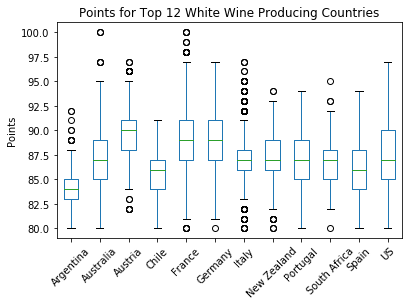

In [101]:
#boxplots to show point distribution by country 
white2.boxplot(column = 'points', by = 'country', rot = 45, grid = False)
plt.title('Points for Top 12 White Wine Producing Countries')
plt.xlabel('')
plt.ylabel('Points')
plt.suptitle('')
plt.show()

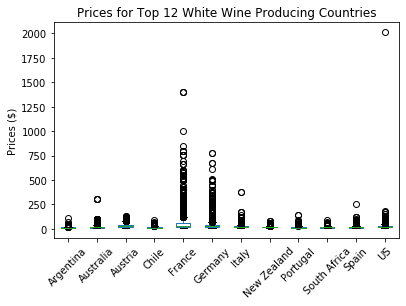

In [102]:
#boxplots to show price distribution by country - THIS WILL BE GOOD TO SHOW IMPACT OF OUTLIERS
white2.boxplot(column = 'price', by = 'country', rot = 45, grid = False)
plt.title('Prices for Top 12 White Wine Producing Countries')
plt.xlabel('')
plt.ylabel('Prices ($)')
plt.suptitle('')
plt.show()

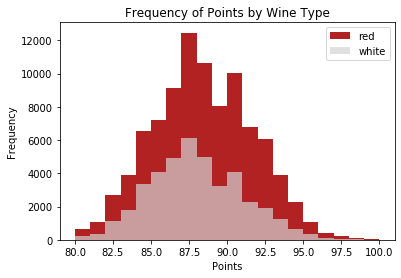

In [28]:
plt.hist(wine_red.points, label = "red", bins = 20, color = 'firebrick')
plt.hist(wine_white.points, label = 'white', bins = 20, color = 'lightgrey', alpha = 0.7)
plt.title ('Frequency of Points by Wine Type')
plt.xlabel('Points')
plt.ylabel('Frequency')
plt.legend(loc="best")
plt.show()

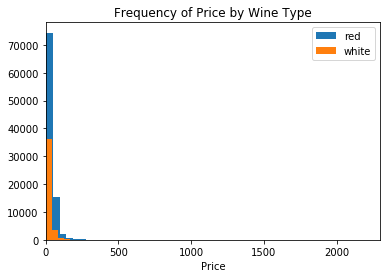

In [29]:
#DO NOT USE
plt.hist(wine_red.price, label = "red", bins = 50)
plt.hist(wine_white.price, label = 'white', bins = 50)
plt.title ('Frequency of Price by Wine Type')
plt.xlim(0,wine_red.price.max())
plt.xlabel('Price')
plt.legend(loc="best")
plt.show()

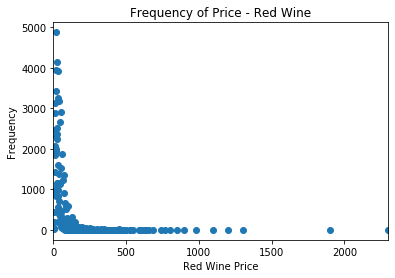

In [30]:
#Alternate way to show skew of prices - PROBABLY DON'T USE
plt.scatter(wine_red.price.value_counts().index, wine_red.price.value_counts().values)
plt.title ('Frequency of Price - Red Wine')
plt.xlim(0,wine_red.price.max())
plt.xlabel('Red Wine Price')
plt.ylabel('Frequency')
plt.show()

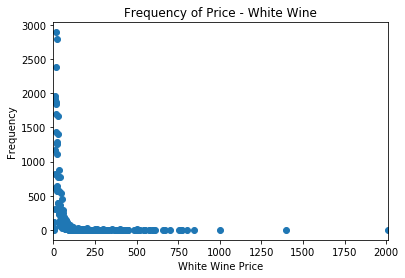

In [31]:
#Alternate way to show skew of prices - DON'T USE
plt.scatter(wine_white.price.value_counts().index, wine_white.price.value_counts().values)
plt.title ('Frequency of Price - White Wine')
plt.xlim(0,wine_white.price.max())
plt.xlabel('White Wine Price')
plt.ylabel('Frequency')
plt.show()

In [32]:
wine_red.price.max()

2300.0

## Points vs Price Correlation - Red vs White

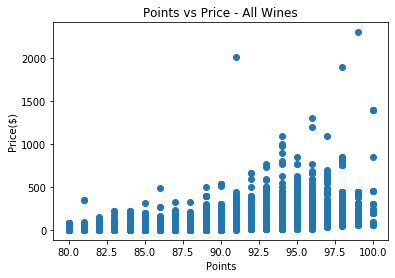

In [33]:
#Scatter of Wine Price vs Wine Points - Total 
plt.scatter(wine_df.points, wine_df.price)
plt.xlabel('Points')
plt.ylabel('Price($)')
plt.title('Points vs Price - All Wines')
plt.show()

,price,points,Still_Red
price,1.000000,0.459624,0.108498
points,0.459624,1.000000,0.061808
Still_Red,0.108498,0.061808,1.000000


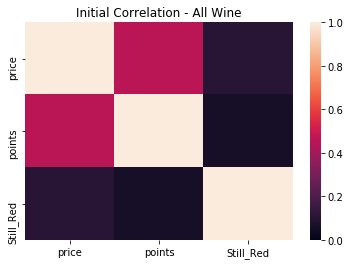

In [34]:
sn.heatmap(wine_df[['price','points','Still_Red']].corr(), vmin=0, vmax=1)
plt.title('Initial Correlation - All Wine')
wine_df[['price','points','Still_Red']].corr()

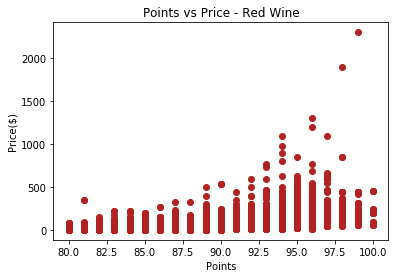

In [35]:
#Scatter of Wine Price vs Wine Points - Red Wine
plt.scatter(wine_red.points, wine_red.price, color = 'firebrick')
plt.xlabel('Points')
plt.ylabel('Price($)')
plt.title('Points vs Price - Red Wine')
plt.show()

           price    points
price   1.000000  0.474773
points  0.474773  1.000000


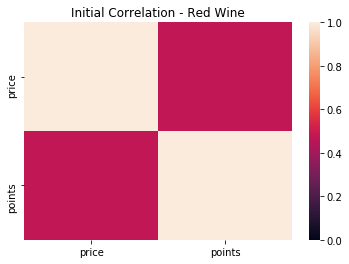

In [36]:
#Correlations - Red Wine
sn.heatmap(wine_red[['price','points']].corr(),vmin=0, vmax=1)
plt.title('Initial Correlation - Red Wine')
print(wine_red[['price','points']].corr())

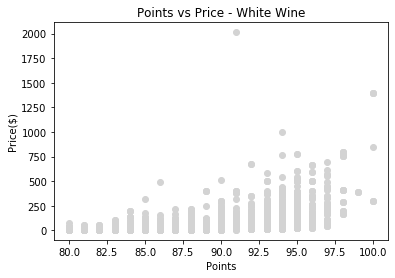

In [37]:
#Scatter of Wine Price vs Wine Points - White Wine
plt.scatter(wine_white.points, wine_white.price, color = 'lightgrey')
plt.xlabel('Points')
plt.ylabel('Price($)')
plt.title('Points vs Price - White Wine')
plt.show()

           price    points
price   1.000000  0.414576
points  0.414576  1.000000


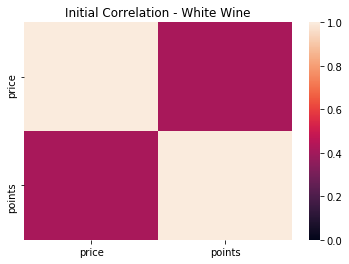

In [38]:
sn.heatmap(wine_white[['price','points']].corr(),vmin=0, vmax=1)
plt.title('Initial Correlation - White Wine')
print(wine_white[['price','points']].corr())

## Statistical Tests

In [39]:
import scipy.stats as stats

### Red vs White Wine - Points 
* Null Hypothesis - There is no difference in the average points of red and white wines 
* Alternate Hypothesis - There is a difference in the average points of red and white wines
* Outcome - At an alpha of 0.05 and with a p-value of almost zero, we reject the null hypothesis that there is no difference in the average points of red and white whines. We have enough evidence to suggest that there is a statistically significant difference in the average red wine points and the average white wine points. 

In [40]:
#T-Test for red vs whitw wine popularity 
stats.ttest_ind(wine_red.points, wine_white.points, equal_var=False)

Ttest_indResult(statistic=23.349294596442785, pvalue=3.4024913851525474e-120)

In [41]:
red_mean = wine_red.points.mean()
red_mean

87.93201032971507

In [42]:
white_mean = wine_white.points.mean()
white_mean

87.49904799101694

In [43]:
wine_red.points.count()

93323

In [44]:
wine_white.points.count()

40966

In [45]:
red_err = stats.sem(wine_red.points)
red_err

0.01076380993151733

In [46]:
white_err = stats.sem(wine_white.points)
white_err

0.015098923061268945

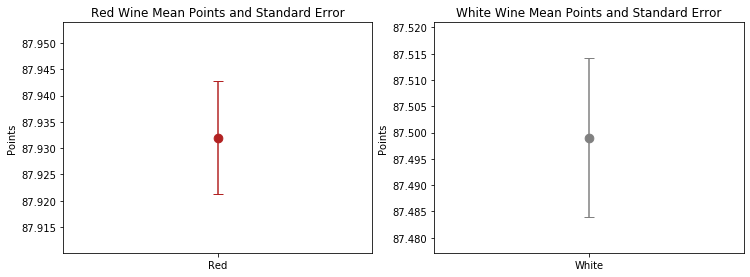

In [80]:
#standard error plot - POINT OUT THE DIFFERENCE IN AXIS; GOOD VIZ FOR T-TEST
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.scatter('Red',red_mean, marker = 'o', color = 'firebrick', s = 75)
ax1.errorbar(0,red_mean, yerr = red_err, color = 'firebrick', capsize = 5)
ax1.set_ylabel('Points')
ax1.set_title('Red Wine Mean Points and Standard Error')
ax2.scatter('White', white_mean, marker = 'o', color = 'grey', s = 75)
ax2.errorbar(0,white_mean, yerr = white_err, color = 'grey', capsize = 5)
ax2.set_ylabel('Points')
ax2.set_title('White Wine Mean Points and Standard Error')
plt.subplots_adjust(bottom=0.1, right=1.7, top=0.9)

#CREATE SECOND Y AND PUT ON THE SAME GRAPH

<Figure size 7200x72000 with 0 Axes>

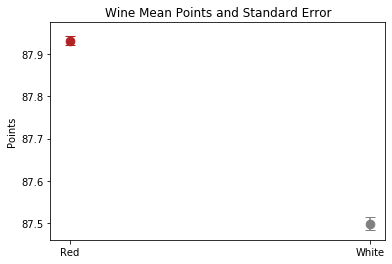

<Figure size 7200x72000 with 0 Axes>

In [75]:
plt.scatter('Red',red_mean, marker = 'o', color = 'firebrick', s = 75)
plt.scatter('White',white_mean, marker = 'o', color = 'grey', s = 75)
plt.errorbar(1,white_mean, yerr = white_err, color = 'grey', capsize = 5)
plt.errorbar(0,red_mean, yerr = red_err, color = 'firebrick', capsize = 5)
plt.title('Wine Mean Points and Standard Error')
plt.ylabel('Points')
plt.figure(figsize = (100,1000))

### Red vs White Wine - Price
* Null Hypothesis - There is no difference in the average price of red and white wines 
* Alternate Hypothesis - There is a difference in the average price of red and white wines
* Outcome - At an alpha of 0.05 and with a p-value of zero, we reject the null hypothesis that there is no difference in the average price of red and white whines. We have enough evidence to suggest that there is a statistically significant difference in the average red wine price and the average white wine price. 

In [48]:
#T-Test for red vs white price 
stats.ttest_ind(wine_red.price, wine_white.price, equal_var=False)

Ttest_indResult(statistic=39.55164412347694, pvalue=0.0)

In [49]:
red_price_mean = wine_red.price.mean()
wht_price_mean = wine_white.price.mean()
red_price_sem = stats.sem(wine_red.price)
wht_price_sem = stats.sem(wine_white.price)

print(red_price_mean,wht_price_mean,red_price_sem,wht_price_sem)

35.947665634409525 27.332177903627397 0.11792129941087051 0.18315010059964076


<Figure size 7200x72000 with 0 Axes>

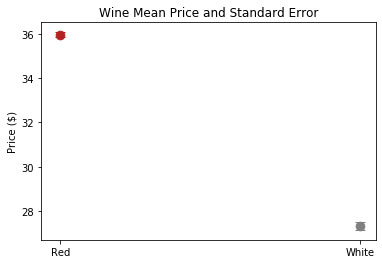

<Figure size 7200x72000 with 0 Axes>

In [87]:
#standard error plot -- POINT OUT THE DIFFERENCE IN AXIS; GOOD VIZ FOR T-TEST

##METHOD ONE

# fig, (ax1, ax2) = plt.subplots(1,2)
# ax1.scatter('Red',red_price_mean, marker = 'o', color = 'firebrick', s = 75)
# ax1.errorbar(0,red_price_mean, yerr = red_price_sem, color = 'firebrick', capsize = 5)
# ax1.set_title('Red Wine Mean Price and Standard Error')

# ax2.scatter('White', wht_price_mean, marker = 'o', color = 'grey', s = 75)
# ax2.errorbar(0,wht_price_mean, yerr = wht_price_sem, color = 'grey', capsize = 5)
# ax2.set_title('White Wine Mean Price and Standard Error')
# plt.subplots_adjust(bottom=0.1, right=1.7, top=0.9)

# fig,ax1 = plt.subplots()
# ##METHOD TWO
# ax1.set_xlabel('Types of Wine')
# ax1.set_ylabel('Avg Price - Red', color='firebrick')
# ax1.scatter(0,red_price_mean, color='firebrick')
# ax1.errorbar(0,red_price_mean, yerr = red_price_sem, color = 'firebrick', capsize = 5)
# ax1.tick_params(axis='y', labelcolor='firebrick')

# ax2=ax1.twinx()
# ax2.set_ylabel('Avg Price - White', color= 'grey')
# ax2.scatter(1, wht_price_mean, color= 'grey')
# ax2.errorbar(1,wht_price_mean, yerr = wht_price_sem, color = 'grey', capsize = 5)
# ax2.tick_params(axis='y', labelcolor='grey')

##METHOD THREE

plt.scatter('Red',red_price_mean, marker = 'o', color = 'firebrick', s = 75)
plt.scatter('White',wht_price_mean, marker = 'o', color = 'grey', s = 75)
plt.errorbar(1,wht_price_mean, yerr = wht_price_sem, color = 'grey', capsize = 5)
plt.errorbar(0,red_price_mean, yerr = red_price_sem, color = 'firebrick', capsize = 5)
plt.ylabel('Price ($)')
plt.title('Wine Mean Price and Standard Error')
plt.figure(figsize = (100,1000))

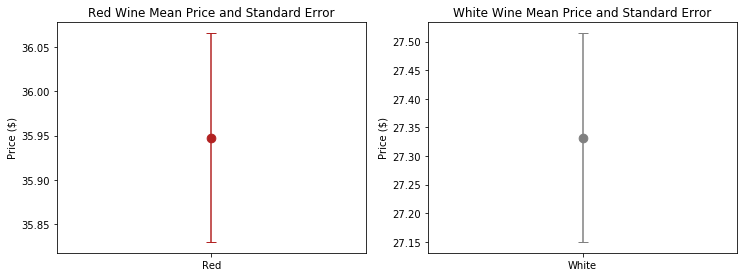

In [86]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.scatter('Red',red_price_mean, marker = 'o', color = 'firebrick', s = 75)
ax1.errorbar(0,red_price_mean, yerr = red_price_sem, color = 'firebrick', capsize = 5)
ax1.set_ylabel('Price ($)')
ax1.set_title('Red Wine Mean Price and Standard Error')

ax2.scatter('White', wht_price_mean, marker = 'o', color = 'grey', s = 75)
ax2.errorbar(0,wht_price_mean, yerr = wht_price_sem, color = 'grey', capsize = 5)
ax2.set_ylabel('Price ($)')
ax2.set_title('White Wine Mean Price and Standard Error')
plt.subplots_adjust(bottom=0.1, right=1.7, top=0.9)

## Data Trimming (Removing Outliers)

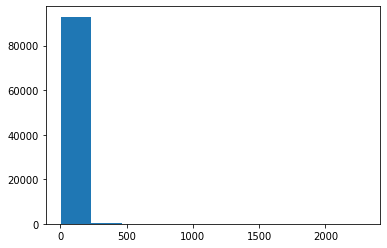

In [51]:
plt.hist(wine_red.price)
plt.show()

In [52]:
import numpy as np 

In [53]:
np.quantile(wine_red.price, 0.975)

110.0

##### red_sub: dataframe from wine_red that takes out the top and bottom 2.5% aka shows the middle 95% of red wines included in wine_red

In [54]:
#Trim out the bottom and top 2.5% - CHANGE IF ONLY PREDICTING FOR CHEAP WINES
new_mask = (wine_red.price > np.quantile(wine_red.price, 0.025)) & (wine_red.price < np.quantile(wine_red.price, 0.975))

red_sub = wine_red.loc[new_mask]
red_sub

,country,description,designation,points,price,province,region_1,region_2,variety,winery,Counts,Red?,Still_Red
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,13625.0,True,1
4,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia,221.0,True,1
5,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,NaN,Tinta de Toro,Maurodos,221.0,True,1
7,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström,13625.0,True,1
8,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm,13625.0,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
134269,France,"This is a lovely, fragrant Burgundy, with a sm...",Clos dea Argillieres,89,52.0,Burgundy,Nuits-St.-Georges,NaN,Pinot Noir,Daniel Rion,13625.0,True,1
134270,France,Scents of graham cracker and malted milk choco...,NaN,89,38.0,Burgundy,Chambolle-Musigny,NaN,Pinot Noir,Michel Gros,13625.0,True,1
134271,France,"This needs a good bit of breathing time, then ...",Les Chaliots,87,37.0,Burgundy,Nuits-St.-Georges,NaN,Pinot Noir,Michel Gros,13625.0,True,1
134272,France,The nose is dominated by the attractive scents...,Les Charmes,87,65.0,Burgundy,Chambolle-Musigny,NaN,Pinot Noir,Daniel Rion,13625.0,True,1


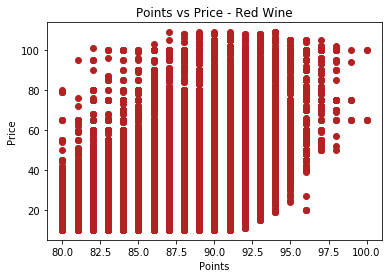

In [55]:
#DUPLICATE
plt.scatter(red_sub.points, red_sub.price, color = 'firebrick')
plt.title('Points vs Price - Red Wine')
plt.xlabel('Points')
plt.ylabel('Price')
plt.show()

         points    price
points  1.00000  0.53865
price   0.53865  1.00000


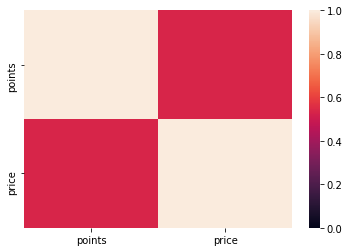

In [56]:
#SHOW CHANGE IN CORRELATION IN REPORT
print(red_sub[['points', 'price']].corr())
sn.heatmap(red_sub[['points', 'price']].corr(),vmin=0, vmax=1)
plt.show()

          points     price
points  1.000000  0.474773
price   0.474773  1.000000


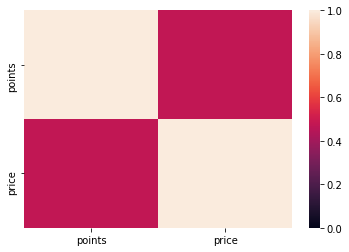

In [57]:
print(wine_red[['points', 'price']].corr())
sn.heatmap(wine_red[['points', 'price']].corr(), vmin = 0, vmax = 1)
plt.show()

In [60]:
red_sub.price.mean()

32.84124487004104

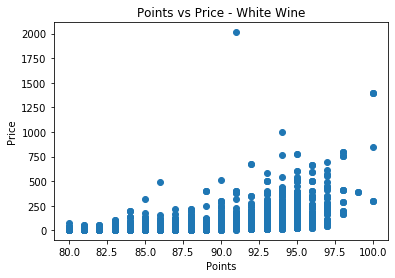

In [61]:
#DUPLICATE
plt.scatter(wine_white.points, wine_white.price)
plt.title('Points vs Price - White Wine')
plt.xlabel('Points')
plt.ylabel('Price')
plt.show()

##### white_sub: dataframe trimming the top and bottom 2.5% from wine_white

In [62]:
new_mask2 = (wine_white.price > np.quantile(wine_white.price, 0.025)) & (wine_white.price < np.quantile(wine_white.price, 0.975))

white_sub = wine_white.loc[new_mask2]
white_sub

,country,description,designation,points,price,province,region_1,region_2,variety,winery,Counts,Red?,Still_Red
22,US,The apogee of this ambitious winery's white wi...,Giallo Solare,95,60.0,California,Edna Valley,Central Coast,Chardonnay,Center of Effort,13775.0,False,0
24,New Zealand,"Yields were down in 2015, but intensity is up,...",Maté's Vineyard,94,57.0,Kumeu,NaN,NaN,Chardonnay,Kumeu River,13775.0,False,0
29,US,"Steely and perfumed, this wine sees only 20% n...",Babushka,90,37.0,California,Russian River Valley,Sonoma,Chardonnay,Zepaltas,13775.0,False,0
31,US,"The aromas entice with notes of wet stone, hon...",Conner Lee Vineyard,90,42.0,Washington,Columbia Valley (WA),Columbia Valley,Chardonnay,Buty,13775.0,False,0
33,France,Gingery spice notes accent fresh pear and melo...,NaN,90,60.0,Rhône Valley,Châteauneuf-du-Pape,NaN,Rhône-style White Blend,Clos de L'Oratoire des Papes,407.0,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
134284,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio,2554.0,False,0
134285,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain,1003.0,False,0
134286,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora,2554.0,False,0
134287,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset,1003.0,False,0


          points     price
points  1.000000  0.536413
price   0.536413  1.000000


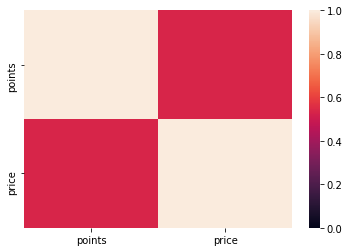

In [63]:
print(white_sub[['points', 'price']].corr())
sn.heatmap(white_sub[['points', 'price']].corr(),vmin=0,vmax=1)
plt.show()

In [64]:
wine_white[['points', 'price']].corr()

,points,price
points,1.000000,0.414576
price,0.414576,1.000000


In [65]:
white_sub.price.mean()

23.84170440510498

In [66]:
stats.ttest_ind(red_sub.price, white_sub.price, equal_var=False)

Ttest_indResult(statistic=92.36818879502194, pvalue=0.0)

In [67]:
wine_sub = red_sub.append(white_sub)
wine_sub

,country,description,designation,points,price,province,region_1,region_2,variety,winery,Counts,Red?,Still_Red
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,13625.0,True,1
4,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia,221.0,True,1
5,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,NaN,Tinta de Toro,Maurodos,221.0,True,1
7,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström,13625.0,True,1
8,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm,13625.0,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
134284,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio,2554.0,False,0
134285,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain,1003.0,False,0
134286,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora,2554.0,False,0
134287,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset,1003.0,False,0


             points     price    Counts  Still_Red
points     1.000000  0.535937  0.066897   0.070902
price      0.535937  1.000000  0.184860   0.222282
Counts     0.066897  0.184860  1.000000  -0.025279
Still_Red  0.070902  0.222282 -0.025279   1.000000


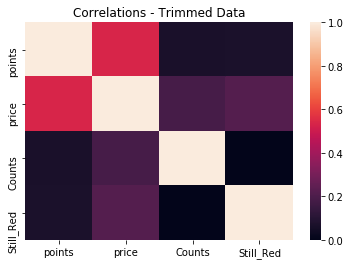

In [68]:
sn.heatmap(wine_sub.corr(), vmin=0, vmax=1)
plt.title('Correlations - Trimmed Data')
print(wine_sub.corr())

In [69]:
wine_sub.describe()

,points,price,Counts,Still_Red
count,126584.000000,126584.000000,126584.000000,126584.000000
mean,87.767245,30.078193,6363.028124,0.692979
std,3.093177,18.675083,5155.713547,0.461260
min,80.000000,9.000000,30.000000,0.000000
25%,86.000000,16.000000,1455.000000,0.000000
50%,88.000000,25.000000,4987.000000,1.000000
75%,90.000000,39.000000,12671.000000,1.000000
max,100.000000,109.000000,13775.000000,1.000000


In [70]:
#get the top ten wine producing countries
mask9 = wine_sub.country.isin(wine_sub.country.value_counts().index[0:9])
top_wines = wine_sub.loc[mask9]

#select specific data points
select_wines = top_wines[[ 'points', 'price', 'Still_Red']]

#dummify the countries - 1 if the wine is from X country, 0 if it isn't
dummy_wines = pd.get_dummies(top_wines.country)

In [ ]:
#join the dummy columns to the original df
full_dummy = select_wines.join(dummy_wines)
full_dummy.corr()

In [ ]:
sn.heatmap(full_dummy.corr())
plt.title('Correlations - With Country Dummies')
print(full_dummy.corr())

### Regression Analysis - Linear 

In [ ]:
import statsmodels.api as sm

#### Regression Analysis - Determine Price with Type of Wine and Points
* wine_sub: To get this data set we trimmed the top and bottom 2.5% of wines from the top 13 countries for red and white wines and then combined the dataframes. 

#### Regression Analysis - Determine Price with Type of Wine, Points, and Country
* full_dummy: to get this dataset we took the top ten countries from the trimmed data (middle 95%) and then dummified the country variables

In [ ]:
#set x and y for regression analysis
X = full_dummy.drop('price', axis =1)
# X = prof_booth[['points','Still_Red']]
y = full_dummy[["price"]]

In [ ]:
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model
# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)
# Print out the statistics
model.summary()

In [ ]:
#Plot predicitions vs actual to see accuracy of model
plt.scatter(predictions, y)
plt.title('Actual vs Predicted Values - Top Ten Countries')

## Statistical Analysis - Price Across Varieties - DON'T MIND THIS

In [ ]:
top_var_red = wine_red.variety.value_counts().head(10)
top_var_red

In [ ]:
group = ["" ,"" ,"" ,"" ,"" ,"" ,"" ,"" ,"" , ""]

count = 0 

for wine in top_var_red.index: 
    group[count] = wine_red[wine_red["variety"] == f'{wine}']["price"]
    count += 1

* group[0] = Pinot Noir
* group[1] = Cabernet Sauvignon 
* group[2] = Red Blend 
* group[3] = Syrah
* group[4] = Merlot
* group[5] = Bordeaux-style Red Blend
* group[6] = Zinfandel
* group[7] = Malbec
* group[8] = Sangiovese
* group[9] = Tempranillo

In [ ]:
stats.f_oneway(group[0], group[1], group[2], group[3], group[4], group[5], group[6], group[7], group[8], group[9])

In [ ]:
a = [ ["Variety", "Price"]]
for wine in top_var_red.index: 
    a[1].append(wine_red.groupby("variety").mean()["price"]

In [ ]:
stats.ttest_ind(group[0], group[1], equal_var=False)

In [ ]:
stats.ttest_ind(group[0], group[2], equal_var=False)

In [ ]:
stats.ttest_ind(group[0], group[3], equal_var=False)

In [ ]:
stats.ttest_ind(group[0], group[4], equal_var=False)

In [ ]:
stats.ttest_ind(group[0], group[5], equal_var=False)

In [ ]:
print(group[0].mean())
print(group[1].mean())
print(group[2].mean())
print(group[3].mean())
print(group[4].mean())
print(group[5].mean())
print(group[6].mean())
print(group[7].mean())
print(group[8].mean())
print(group[9].mean())

In [ ]:
print(group[0].sem())
print(group[1].sem())
print(group[2].sem())
print(group[3].sem())
print(group[4].sem())
print(group[5].sem())
print(group[6].sem())
print(group[7].sem())
print(group[8].sem())
print(group[9].sem())

In [ ]:
b = []
for wines in top_var_red.index: 
    mask_b = wine_red.variety == wines 
    df_b[wines] = wine_red.loc[mask_b]['price']

In [ ]:
df_b

## Random Fun with Alexander (Random Forest Regressor)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# Labels are the values we want to predict
labels = np.array(full_dummy['price'])
# Remove the labels from the features
# axis 1 refers to the columns
features= full_dummy.drop('price', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [ ]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets - want to aim for 75% of data used to train, then test on remaining 25%
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [ ]:
# Instantiate model with 100 decision trees
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

In [ ]:
#bring back correlation coefficient? or is this the r-squared? 
rf.score(test_features, test_labels)

In [ ]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'dollars.')

In [ ]:
list(zip(feature_list, rf.feature_importances_))

In [ ]:
plt.scatter(predictions, test_labels)

## More Fun - Simple Regression Model

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(train_features, train_labels)

In [ ]:
predictions_lm = lm.predict(test_features)

# Calculate the absolute errors
errors = abs(predictions_lm - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'dollars.')

In [ ]:
lm.score(test_features, test_labels)

In [ ]:
plt.scatter(predictions_lm, test_labels)

In [ ]:
list(zip(feature_list,lm.coef_))

In [ ]:
lm.intercept_